#  Indicadores Educativos  
----ANALISIS PARA ESTABLECER UN OBJETIVO---
(Aprobación, Deserción, tasas de cobertura, reprobación y matriculación) 

# 📂1.--- Importar las librerías necesarias ---

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Esta es una conclusión de ejemplo

# 📥2.--- Carga de datos ---

In [72]:
data= pd.read_csv("Estadísticas en Educación.csv")
data.head()

,AÑO,CÓDIGO_MUNICIPIO,MUNICIPIO,CÓDIGO_DEPARTAMENTO,DEPARTAMENTO,CÓDIGO_ETC,ETC,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,...,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
0,2023,5001,Medellín,5,Antioquia,3759.0,Medellín,377562,96.15,95.94,...,9.23,0.15,6.21,15.40,7.27,9.25,1.82,8.34,13.69,4.48
1,2023,5002,Abejorral,5,Antioquia,3758.0,Antioquia (ETC),3634,74.38,74.38,...,7.77,0.56,7.26,10.93,4.41,9.07,1.67,10.28,11.32,2.20
2,2023,5004,Abriaquí,5,Antioquia,3758.0,Antioquia (ETC),503,62.62,62.62,...,6.55,0.00,1.96,16.51,2.04,9.52,0.00,10.46,13.76,2.04
3,2023,5021,Alejandría,5,Antioquia,3758.0,Antioquia (ETC),864,81.37,81.37,...,7.88,0.00,7.02,13.65,2.40,7.20,1.59,7.69,11.65,0.00
4,2023,5030,Amagá,5,Antioquia,3758.0,Antioquia (ETC),5060,78.30,78.30,...,10.71,0.00,9.63,16.48,5.50,12.08,0.29,11.54,18.48,3.98


# 🔍 3.--- EDA (Exploración y Analisis de Datos)---

In [73]:
# Informacion general del Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14585 entries, 0 to 14584
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AÑO                          14585 non-null  int64  
 1   CÓDIGO_MUNICIPIO             14585 non-null  int64  
 2   MUNICIPIO                    14585 non-null  object 
 3   CÓDIGO_DEPARTAMENTO          14585 non-null  int64  
 4   DEPARTAMENTO                 14585 non-null  object 
 5   CÓDIGO_ETC                   14585 non-null  float64
 6   ETC                          14585 non-null  object 
 7   POBLACIÓN_5_16               14579 non-null  object 
 8   TASA_MATRICULACIÓN_5_16      14470 non-null  float64
 9   COBERTURA_NETA               14474 non-null  float64
 10  COBERTURA_NETA_TRANSICIÓN    14533 non-null  float64
 11  COBERTURA_NETA_PRIMARIA      14494 non-null  float64
 12  COBERTURA_NETA_SECUNDARIA    14491 non-null  float64
 13  COBERTURA_NETA_M

In [74]:
# Verificación de valores nulos en las columnas
print("Columnas con datos faltantes:")
null_cols= data.columns[data.isnull().any()]
for col in null_cols:
    print(f"Columna: {col} → Nulos: {data[col].isnull().sum()} → Tipo: {data[col].dtype}")

Columnas con datos faltantes:
Columna: POBLACIÓN_5_16 → Nulos: 6 → Tipo: object
Columna: TASA_MATRICULACIÓN_5_16 → Nulos: 115 → Tipo: float64
Columna: COBERTURA_NETA → Nulos: 111 → Tipo: float64
Columna: COBERTURA_NETA_TRANSICIÓN → Nulos: 52 → Tipo: float64
Columna: COBERTURA_NETA_PRIMARIA → Nulos: 91 → Tipo: float64
Columna: COBERTURA_NETA_SECUNDARIA → Nulos: 94 → Tipo: float64
Columna: COBERTURA_NETA_MEDIA → Nulos: 93 → Tipo: float64
Columna: COBERTURA_BRUTA → Nulos: 68 → Tipo: float64
Columna: COBERTURA_BRUTA_TRANSICIÓN → Nulos: 97 → Tipo: float64
Columna: COBERTURA_BRUTA_PRIMARIA → Nulos: 81 → Tipo: float64
Columna: COBERTURA_BRUTA_SECUNDARIA → Nulos: 88 → Tipo: float64
Columna: COBERTURA_BRUTA_MEDIA → Nulos: 127 → Tipo: float64
Columna: TAMAÑO_PROMEDIO_DE_GRUPO → Nulos: 7013 → Tipo: float64
Columna: SEDES_CONECTADAS_A_INTERNET → Nulos: 6817 → Tipo: float64
Columna: DESERCIÓN → Nulos: 142 → Tipo: float64
Columna: DESERCIÓN_TRANSICIÓN → Nulos: 903 → Tipo: float64
Columna: DESERCIÓN_

Observamos que las columnas TAMAÑO_PROMEDIO_DE_GRUPO tiene 7013 valores nulos, mientras que la columna SEDES_CONECTADAS_A_INTERNET	tiene 6817 valores nulos. Para dar tratamiento procedemos a...

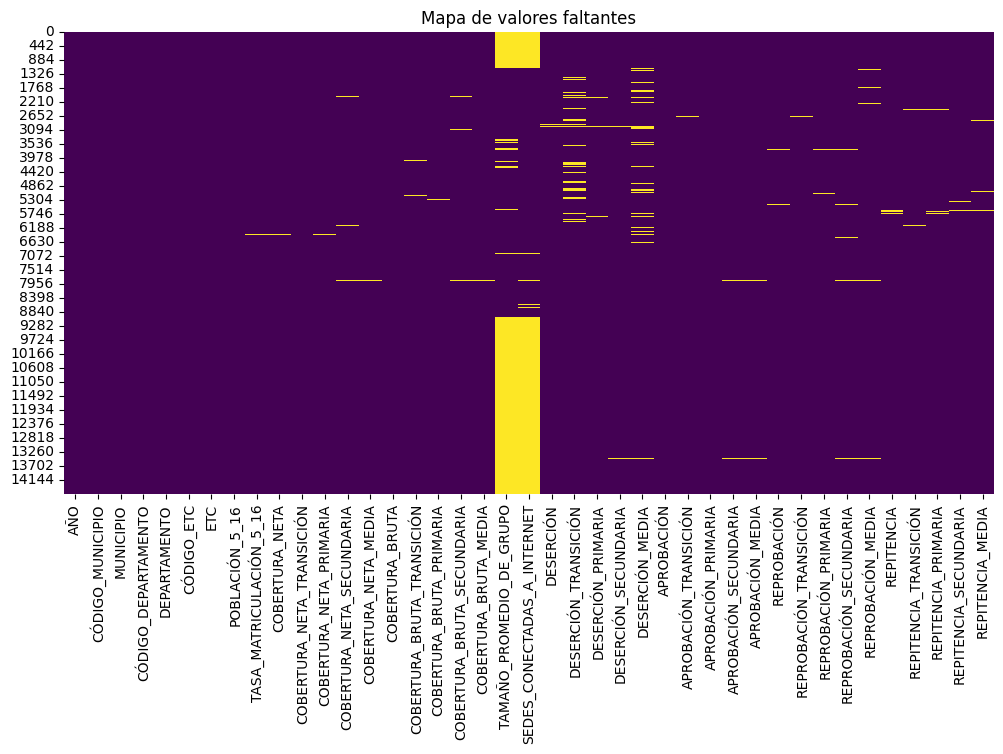

In [75]:
#Gráfica de datos faltantes
import seaborn as sns
import matplotlib.pyplot as plt
# Crear una figura
plt.figure(figsize=(12,6))
# Generar el heatmap de valores faltantes
sns.heatmap(data.isnull(), cmap="viridis", cbar=False)
# Agregar título
plt.title("Mapa de valores faltantes")
plt.show()

In [76]:
#Verificación de filas y columnas duplicadas

# Filas duplicadas
duplicate_rows = data[data.duplicated()]

# Columnas duplicadas
duplicate_columns = data.T.duplicated(keep=False)
duplicated_column_names = data.columns[duplicate_columns]

# Mostrar resultados
print(f" Total de filas duplicadas: {duplicate_rows.shape[0]}")
if not duplicate_rows.empty:
    print("\n Filas duplicadas en el dataset:")
    print(duplicate_rows)
else:
    print("\n No hay filas duplicadas.")

print("\n Columnas duplicadas en el dataset:")
if len(duplicated_column_names) > 0:
    print(duplicated_column_names.tolist())
else:
    print("\n No hay columnas duplicadas.")

 Total de filas duplicadas: 0

 No hay filas duplicadas.

 Columnas duplicadas en el dataset:
['APROBACIÓN_TRANSICIÓN', 'REPROBACIÓN_TRANSICIÓN']


In [77]:
#Verificar los valores "0" de cada columna
(data == 0).sum()

AÑO                                0
CÓDIGO_MUNICIPIO                   3
MUNICIPIO                          0
CÓDIGO_DEPARTAMENTO                3
DEPARTAMENTO                       0
CÓDIGO_ETC                         3
ETC                                0
POBLACIÓN_5_16                     0
TASA_MATRICULACIÓN_5_16            5
COBERTURA_NETA                     8
COBERTURA_NETA_TRANSICIÓN          9
COBERTURA_NETA_PRIMARIA            8
COBERTURA_NETA_SECUNDARIA         26
COBERTURA_NETA_MEDIA              50
COBERTURA_BRUTA                    8
COBERTURA_BRUTA_TRANSICIÓN         8
COBERTURA_BRUTA_PRIMARIA           8
COBERTURA_BRUTA_SECUNDARIA        26
COBERTURA_BRUTA_MEDIA             43
TAMAÑO_PROMEDIO_DE_GRUPO           0
SEDES_CONECTADAS_A_INTERNET      284
DESERCIÓN                         55
DESERCIÓN_TRANSICIÓN            1219
DESERCIÓN_PRIMARIA               355
DESERCIÓN_SECUNDARIA             195
DESERCIÓN_MEDIA                  698
APROBACIÓN                         3
A

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21396\2550332263.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=zero_df, x='% de Ceros', y='Columna', palette='coolwarm')


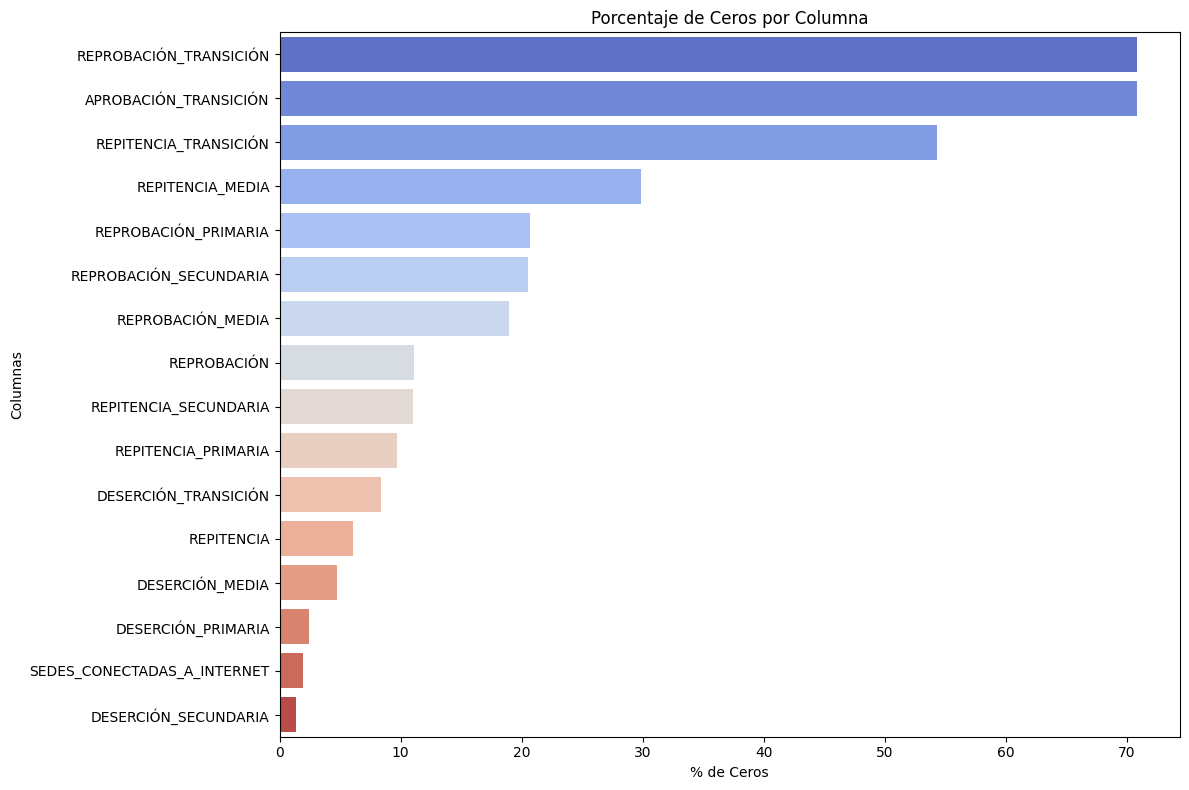

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calcular % de ceros por columna
zero_counts = (data == 0).sum()
total_rows = len(data)
zero_percentage = (zero_counts / total_rows) * 100

# Crear DataFrame para visualización
zero_df = pd.DataFrame({
    'Columna': zero_counts.index,
    '% de Ceros': zero_percentage
}).sort_values('% de Ceros', ascending=False)

# Filtrar columnas con al menos 1% de ceros (puedes cambiar el umbral)
zero_df = zero_df[zero_df['% de Ceros'] > 1]

# Visualización con seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=zero_df, x='% de Ceros', y='Columna', palette='coolwarm')
plt.title('Porcentaje de Ceros por Columna')
plt.xlabel('% de Ceros')
plt.ylabel('Columnas')
plt.tight_layout()
plt.show()

In [ ]:
# Tabla resumen resumen por columna
summary = pd.DataFrame({
    'Columna': data.columns,
    '% de Ceros': (data == 0).sum() / len(data) * 100,
    '% Nulos': data.isnull().sum() / len(data) * 100,
    'Valores Únicos': data.nunique()
}).sort_values(['% de Ceros', '% Nulos'], ascending=False)

# Agregar una sugerencia automatizada
summary['Sugerencia'] = summary.apply(
    lambda row: '❌ Revisar (muchos ceros/nulos o constante)' 
        if (row['% de Ceros'] > 50 or row['% Nulos'] > 50 or row['Valores Únicos'] <= 1)
    else '⚠️ Considerar (alta proporción de ceros o pocos valores)'
        if (row['% de Ceros'] > 30 or row['Valores Únicos'] <= 3)
    else '✅ Conservar', axis=1
)

# Mostrar las columnas más problemáticas primero
summary.reset_index(drop=True, inplace=True)
summary.head(41)  # Puedes cambiar el número de filas mostradas

,Columna,% de Ceros,% Nulos,Valores Únicos,Sugerencia
0,APROBACIÓN_TRANSICIÓN,70.826191,0.637641,660,❌ Revisar (muchos ceros/nulos o constante)
1,REPROBACIÓN_TRANSICIÓN,70.826191,0.637641,660,❌ Revisar (muchos ceros/nulos o constante)
2,REPITENCIA_TRANSICIÓN,54.268084,1.090161,876,❌ Revisar (muchos ceros/nulos o constante)
3,REPITENCIA_MEDIA,29.852588,0.953034,963,✅ Conservar
4,REPROBACIÓN_PRIMARIA,20.692492,0.665067,1487,✅ Conservar
5,REPROBACIÓN_SECUNDARIA,20.527940,0.726774,2211,✅ Conservar
6,REPROBACIÓN_MEDIA,18.964690,0.994172,1600,✅ Conservar
7,REPROBACIÓN,11.141584,0.589647,1569,✅ Conservar
8,REPITENCIA_SECUNDARIA,11.025026,1.042167,1770,✅ Conservar
9,REPITENCIA_PRIMARIA,9.729174,1.014741,1495,✅ Conservar


#  CONSIDERACIONES PARCIALES para Evaluar columnas a eliminar: 

1. Las columnas 'TAMAÑO_PROMEDIO_DE_GRUPO' y 'SEDES_CONECTADAS_A_INTERNET' presentan 7013 y 6817 valores nulos respectivamentes se eliminan del dataset ya que no aportan significativamenta a la evaluacin e hipotesis tomada en cuanta como objeto de estudio. 

2. Las columnas 'APROBACIÓN_TRANSICIÓN' y 'REPROBACIÓN_TRANSICIÓN' estan duplicadas, se decidirà cual dejar.

3. las columnas tipo id y códigos se deben análizar para decidir cuales eliminar.

4. REPITENCIA_TRANSICIÓN en la tabla resumen por columna arroja una sugerencia de Revisar, sin ebargo debido a al significado de los velores, donde, 0 es el mejor valor ya que los casos de repitencia son bajos, entonces seguimos considerando esta columna para nuestro estudio.(mientras sea o hay menos niños repitientiendo el periodo escolar)

In [ ]:
#Eliminar columnas innecesarias para el análisis ()